In [ ]:
# loading the Dataset
df=pd.read_csv(r"emails.csv",sep=",", error_bad_lines=False, engine="python")
df.head()


<ipython-input-13-091fe19761a1>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r"emails.csv",sep=",", error_bad_lines=False, engine="python")
Skipping line 6152: unexpected end of data


,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


###### in the above dataset there are three unneccessry column so we have to remove those columns

In [ ]:
df.drop(columns=['Unnamed: 0','filename','Message-ID'],axis=1,inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(20)

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,Abusive
7,sorry i've taken so long...just been trying to...,Abusive
8,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
9,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6150 non-null   object
 1   Class    6150 non-null   object
dtypes: object(2)
memory usage: 96.2+ KB


In [ ]:
df.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
df.duplicated().sum()

2920

In [ ]:
#removing duplicated
df = df.drop_duplicates(keep='first')

In [ ]:
df.Class.value_counts()

Non Abusive    1956
Abusive        1274
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()

In [ ]:
df["Class"]=lb.fit_transform(df["Class"])

In [ ]:
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

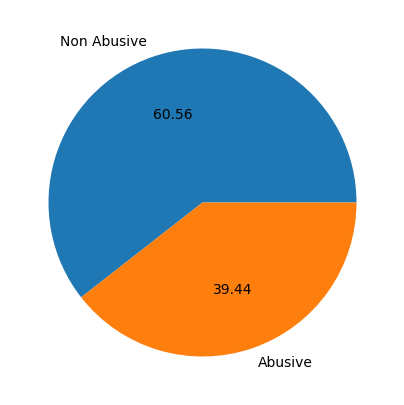

In [ ]:
plt.figure(figsize=(12,5))
plt.pie(df.Class.value_counts(),labels=['Non Abusive','Abusive'],autopct='%0.2f')
plt.show()

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **Sentiment Analysis**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['scores'] = df['content'].apply(analyzer.polarity_scores)

def get_sentiment(score):
    threshold = 0.05
    if score['compound'] >= threshold:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    return sentiment

df['sentiment'] = df['scores'].apply(get_sentiment)
df

,content,Class,scores,sentiment
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,"{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp...",negative
1,fuck you,0,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",negative
2,Gentlemen:\nThe following champagne is availab...,0,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",positive
3,sorry i've taken so long...just been trying to...,0,"{'neg': 0.142, 'neu': 0.767, 'pos': 0.091, 'co...",negative
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,"{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'comp...",negative
...,...,...,...,...
6145,what are you doing tonight?,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",negative
6146,what are you doing tonight,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",negative
6147,how about benjys?,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",negative
6148,just a vicious rumor... my birthday's not till...,1,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",negative


In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def text_transformation(txt):
    txt=txt.lower()
    txt=word_tokenize(txt)
    trans_txt=[]
    for i in txt:
        if i.isalnum() and i not in stopwords.words('english'):
            trans_txt.append(ps.stem(i))
    return " ".join(trans_txt)

In [ ]:
text_transformation('I AM MEGHA #6789 having $living running! giving')

'megha 6789 live run give'

## **Topic Modeling**

In [ ]:
# Importing modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents = df['content'].apply(text_transformation)
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(documents)

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

# Print the topics from the LDA model
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i]) for i in topic.argsort()[:-20 - 1:-1]])

print_topics(lda_model, vectorizer)


Topic 0:
['showtim', 'messag', 'loss', 'ce', 'star', 'tout', 'est', 'zip', 'pariba', 'network', 'bnp', '30', 'fantasi', 'futur', 'code', 'dilut', 'swap', 'houston', 'se', 'sont']
Topic 1:
['phillip', 'messag', '2001', 'subject', 'sent', 'pleas', 'need', 'use', 'cost', 'work', 'know', 'compani', 'thank', 'contract', 'plan', 'project', 'price', 'mailto', 'deal', 'like']
Topic 2:
['final', 'schedul', 'hour', 'prefer', 'varianc', 'engi', 'tabl', 'epmi', 'data', 'iso', 'bad', 'sp15', 'np15', '21', 'ech1', 'detect', '17', 'firm', 'load', 'tblload']
Topic 3:
['pm', 'sat', 'outag', 'london', 'ct', 'pt', 'fri', 'purpos', 'mm', 'backout', 'time', 'center', 'pager', 'jfk51272', 'lng', 'corp', '7000', 'hell', 'origin', 'restor']
Topic 4:
['say', 'day', 'said', 'santa', 'dog', 'love', 'like', 'want', 'littl', 'year', 'dear', 'know', 'ass', 'god', 'boy', 'mother', 'mom', 'hous', 'peopl', 'make']
Topic 5:
['excelr', 'pleas', 'excelrxg', 'ee', 'meet', 'report', 'pm', 'commun', 'subject', 'jame', 'ga',

# Word Embedding

In [ ]:
# Importing necessary libraries
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

sentences = [str(i).split(' ') for i in documents.tolist()]

# Training the model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print(model.wv['men'])

# Summarize vocabulary
words = list(model.wv.key_to_index)
print(words)

# Getting the vectors of the words in the vocabulary
word_vectors = [model.wv[word] for word in words]

# Clustering the word vectors
kmeans = KMeans(n_clusters=14, random_state=0).fit(word_vectors)

# Printing out the words grouped by topic
for i in range(14):
    # print(f"Topic #{i+1}:")
    print([words[j] for j in range(len(words)) if kmeans.labels_[j] == i])


[ 1.1218721   0.5981031   0.01006432 -0.41079903  0.88134354  0.9067777
 -0.15229246 -0.19001873 -0.16577257  0.27583706 -0.12360832 -0.333713
  0.07143871  0.15184493 -0.22709927 -0.14321207 -0.08553892  0.6826444
 -0.8986797  -0.09950918 -0.14504676 -0.603224   -0.8166196   0.5442713
 -0.39227346 -0.20595379 -0.61542296  0.07958392 -0.43173072  0.672673
 -0.78053784  0.6405938  -0.8615555  -0.77921766 -0.19405425 -0.09178904
 -0.2418124  -0.01319687 -0.6707531   0.41399977  0.02257475  0.08863712
 -0.6880472   0.643176    0.45289564 -0.12942655 -0.2937639  -0.54672223
  0.41587007  0.3632578  -0.85687107 -0.14399694 -0.02289755 -0.05395067
 -0.5121547   0.5743026  -0.30129305 -0.04776126  0.36571318  0.5842547
  0.62456733 -0.01219839 -0.14575711  0.9724783  -1.0134236   0.6167321
  1.0716944  -0.13690999  0.10757288 -0.05925578 -0.06960198 -0.14793092
  0.1642511  -0.44616562 -0.35690773  1.1269441  -0.06713618  0.05318787
  0.15747257 -0.73165965  0.6073594   0.1611672   1.1054254 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['hourahead', 'pars', 'huntley', 'louis', 'pic', 'mailbox', 'aep', 'meri', 'farmer', 'search', 'slafontain', 'assumpt', 'tw', 'url', 'zp26', '274', 'breaker', 'deliver', 'wager', 'outlin', 'ectstsw', 'suspend', 'owa', 'timothi', 'pge2', 'pl', 'expir', 'lng', 'strip', '07', 'ps', 'assert', '77055', 'profil', 'pira', 'older', 'wade', 'hayden', 'asap', 'ft', 'automat', 'solicit', 'carolin', 'notif', 'registr', 'brm', 'achiev', 'hydro', 'kristin', 'hoskin', 'circl', 'task', 'mid', 'serenad', 'glenlivet', 'exit', 'ectstca', 'inquiri', 'salli', 'pipe', 'mitig', 'closer', 'coffe', 'spirit', 'contractor', 'asleep', 'script', 'pge3', 'honestli', 'republ', 'moral', 'fangm', 'merger', 'rotat', 'foreclos', 'expressli', 'zipper', 'summar', 'reward', 'meal', 'redissemin', 'gralla', 'donat', 'heizenrad', '1400', 'instrument', 'length', '130228', 'expans', '400', 'exact', 'incorpor', 'versu', 'apr', 'gmt', 'jdasov', '30th', 'mann', 'amazon', 'audit', 'rsvp', 'fortifi', '77002', 'chica', 'ol', 'ski', '

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

def pos_taging(txt):
  tokens = nltk.word_tokenize(txt)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags

documents_pos_tag = df['content'].apply(pos_taging)

print(documents_pos_tag)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0       [(eat, NN), (shit, VBD), (John, NNP), (J, NNP)...
1                                [(fuck, NN), (you, PRP)]
2       [(Gentlemen, NNS), (:, :), (The, DT), (followi...
3       [(sorry, NN), (i, NN), ('ve, VBP), (taken, VBN...
4       [(asshole, JJ), (John, NNP), (J, NNP), (Lavora...
                              ...                        
6145    [(what, WP), (are, VBP), (you, PRP), (doing, V...
6146    [(what, WP), (are, VBP), (you, PRP), (doing, V...
6147      [(how, WRB), (about, IN), (benjys, NN), (?, .)]
6148    [(just, RB), (a, DT), (vicious, JJ), (rumor, N...
6149    [(it, PRP), (was, VBD), (almost, RB), (worth, ...
Name: content, Length: 3230, dtype: object


In [ ]:
df['charecter']=df['content'].apply(len)
df['sentence_count']= df['content'].apply(lambda x:len(sent_tokenize(x)))
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

<Axes: xlabel='charecter', ylabel='Count'>

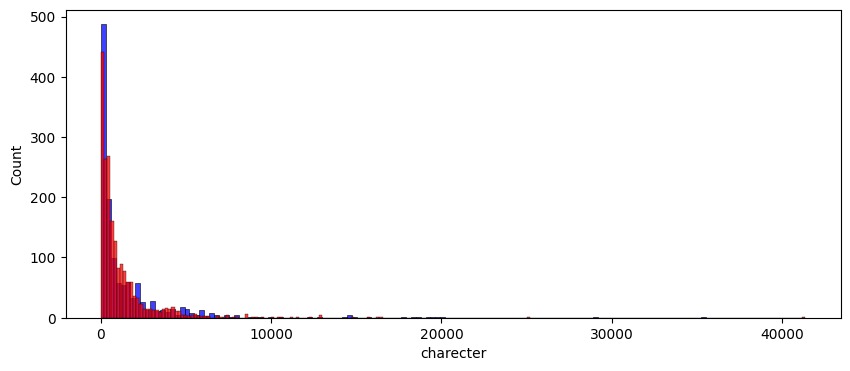

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==0]['charecter'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==1]['charecter'],color='red',label='nonAbusive')

<Axes: xlabel='sentence_count', ylabel='Count'>

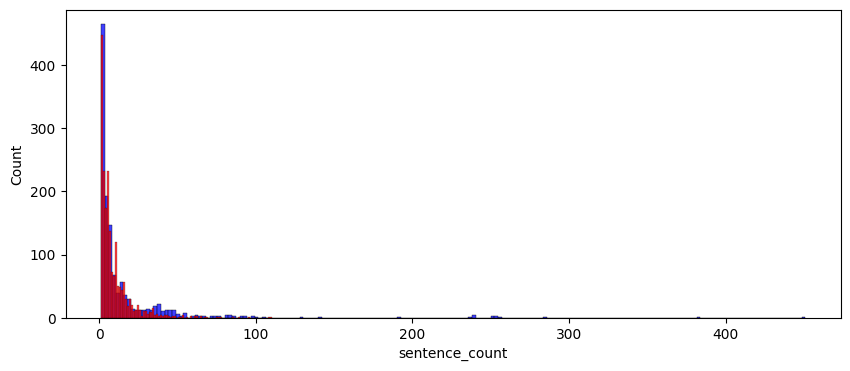

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==0]['sentence_count'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==1]['sentence_count'],color='red',label='nonAbusive')

<Axes: xlabel='num_words', ylabel='Count'>

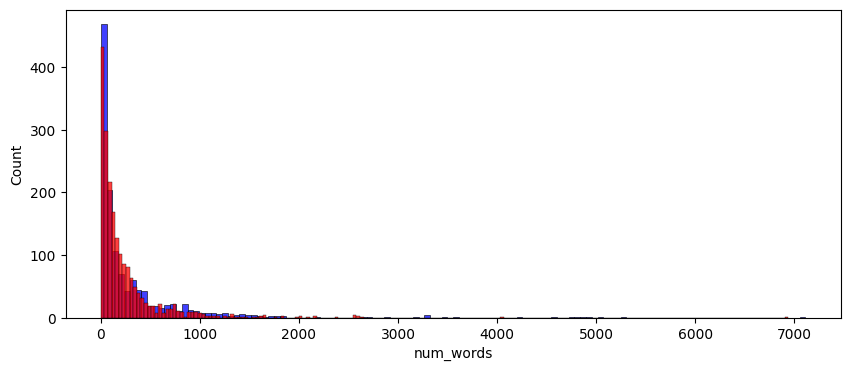

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class']==0]['num_words'],color='blue',label='Abusive')
sns.histplot(df[df['Class']==1]['num_words'],color='red',label='nonAbusive')

In [ ]:
df['clean_content']=df['content'].apply(text_transformation)

In [ ]:
df.head(50)

,content,Class,scores,sentiment,charecter,sentence_count,num_words,clean_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,"{'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp...",negative,220,1,44,eat shit john j lavorato excelr pm john ect cc...
1,fuck you,0,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",negative,8,1,2,fuck
2,Gentlemen:\nThe following champagne is availab...,0,"{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",positive,612,6,99,gentlemen follow champagn avail 70 approxim re...
3,sorry i've taken so long...just been trying to...,0,"{'neg': 0.142, 'neu': 0.767, 'pos': 0.091, 'co...",negative,505,9,163,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,"{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'comp...",negative,203,2,42,asshol john j lavorato excelr john ect cc subj...
5,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",negative,212,1,41,asshol john j lavorato excelr john ect cc subj...
6,Do you know my hr rep's name?\n\n\n\nJennifer ...,0,"{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...",negative,146,3,35,know hr rep name jennif burn pm john ect cc su...
14,hey stupid-it is almost yr-end. please do you...,0,"{'neg': 0.29, 'neu': 0.663, 'pos': 0.046, 'com...",negative,211,4,43,hey almost pleas review never go squeez lime c...
15,forgot to send this last week..\nhope you had ...,0,"{'neg': 0.011, 'neu': 0.951, 'pos': 0.038, 'co...",positive,1446,10,305,forgot send last week hope good wknd ca messag...
16,\ngot this from late friday. have you ever hea...,0,"{'neg': 0.231, 'neu': 0.689, 'pos': 0.08, 'com...",negative,535,10,109,got late friday ever heard messag jeff lawson ...


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=4000)

In [ ]:
x=tfidf.fit_transform(df['clean_content']).toarray()

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(3230, 4000)

In [ ]:
y=df['Class']

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
# non Abused word
non_abused_wc=wc.generate(df[df['Class']==1]['clean_content'].str.cat(sep=' '))

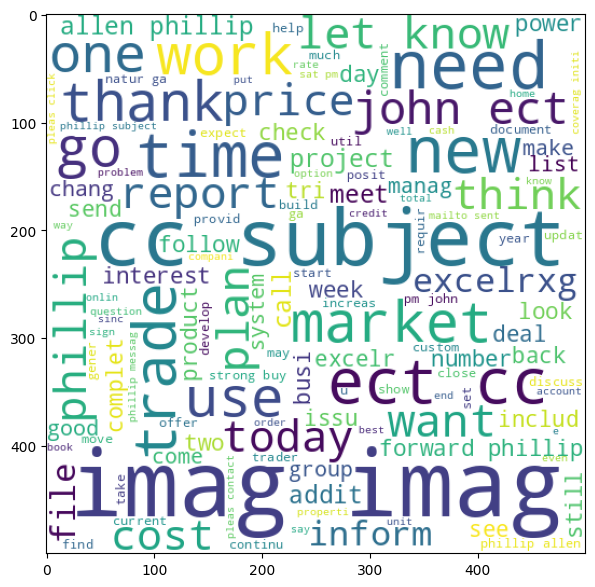

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(non_abused_wc)

In [ ]:
# abused wordCloud
abused_wc=wc.generate(df[df['Class']==0]['clean_content'].str.cat(sep=' '))

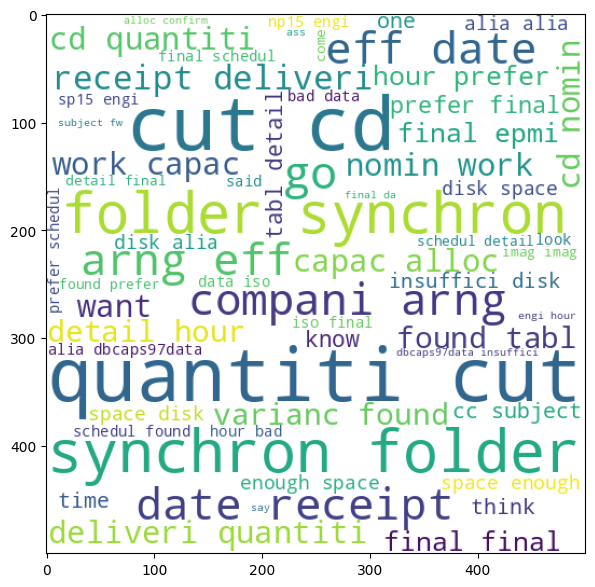

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(abused_wc)

# Model Building

##### spliting data into train and test part

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnl=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_prdct1=gnb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_prdct1))

0.8696060037523452


In [ ]:
# gaussian precission
print(precision_score(y_test,y_prdct1))

0.8977635782747604


In [ ]:
# multinomial naive model
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_prdct2=mnb.predict(x_test)

In [ ]:
# Multinomial Accuracy
print(accuracy_score(y_test,y_prdct2))

0.9090056285178236


In [ ]:
# multinomial Precission
print(precision_score(y_test,y_prdct2))

0.8868194842406877


In [ ]:
bnl.fit(x_train,y_train)
y_prdct3=bnl.predict(x_test)

In [ ]:
# bernauli accurcy score
print(accuracy_score(y_test,y_prdct3))

0.8827392120075047


In [ ]:
# bernauli precission score
print(precision_score(y_test,y_prdct3))

0.8646723646723646


In [ ]:
# data Frame with accuracy and pression score
score=pd.DataFrame({'model':['GaussiaanNB','MultinomialNB','BernauliNB'],'Accuracy':[accuracy_score(y_test,y_prdct1),accuracy_score(y_test,y_prdct2),accuracy_score(y_test,y_prdct3)],'Precission':[precision_score(y_test,y_prdct1),precision_score(y_test,y_prdct2),precision_score(y_test,y_prdct3)]})

In [ ]:
score

,model,Accuracy,Precission
0,GaussiaanNB,0.869606,0.897764
1,MultinomialNB,0.909006,0.886819
2,BernauliNB,0.882739,0.864672
